# GeoParse.py

#### Shapefile Sources:

BUILDINGS UK
http://ajrae.staff.shef.ac.uk/buildings/

RIVERS UK https://www.ordnancesurvey.co.uk/opendatadownload/products.html#OPRVRS

RIVERS LONDON
https://data.london.gov.uk/dataset/water-quality-london-rivers-other-waterbodies

In [3]:
import numpy as np
import geopandas as gp
import matplotlib.pyplot as plt
from shapely.geometry import Point

Set **Lat,Lon** and distance **Threshold** parameters. 

Also *building* and *river* shape file locations.

In [251]:
lat,lon = (51.484575, -0.134605)
point = Point(lon,lat)

thresh = 0.03
print (lat,lon)

buildings = 'london_buildings_270315/London_buildings_districts_270315.shp'
rivers = 'WFD_London/WFD_London.shp'

(51.484575, -0.134605)


In [29]:
data_build = gp.read_file(buildings)
#print('boroughs',set(datauild_b.NAME))
#data_river = gp.read_file(rivers)
#print('boroughs',set(datauild_b.NAME))

In [137]:
data_river = gp.read_file('erc110108v2/ERC110108v2.shp')

Filter the building file by boroughs of interest. 

 \+ convert into lat-lon scale



In [14]:
borough = data_build[(data_build.NAME=='Westminster') ^ (data_build.NAME=='Wandsworth')^ (data_build.NAME=='Lambeth')].to_crs(epsg=4326).reset_index()

In [169]:
river = data_river[data_river.BASINNAME=='Thames'].to_crs(epsg=4326).reset_index()#[(data_river.RBD_NAME=='Thames') & (data_river.MNCAT_NAME=='London')].to_crs(epsg=4326).reset_index()

Get Values within our threshold of our location

In [252]:
mx,xn,my,yn = None,1e99,None,1e99
keep = []
for r in borough.iterrows():
    dst = point.distance(r[1].geometry)
    if abs(dst) < thresh:
        x,y = r[1].geometry.exterior.coords.xy
        mx = max(np.max(x),mx)
        xn = min(np.min(x),xn)
        my = max(np.max(y),my)
        yn = min(np.min(y),yn)
        
        keep.append([list(x),list(y)])
print (len(keep))


5486


In [246]:
water = []

for r in river.iterrows():
        x,y = r[1].geometry.exterior.coords.xy
        
        water.append([list(x),list(y)])
print (len(water))

1


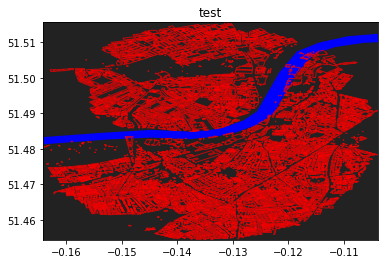

In [253]:

fig = plt.figure()
ax = fig.add_subplot(111)

for poly in water:
    x,y = poly
    #ax.plot(x, np.array(y)-0.001, color='orange', alpha=0.7,
     #  linewidth=5, solid_capstyle='round', zorder=2)
    ax.fill(x,np.array(y)-0.001,'#222222')



for poly in keep:
    x,y = poly
    ax.plot(x, y, color='red', alpha=0.7,
        linewidth=1, solid_capstyle='round', zorder=2)
x,y = poly
ax.plot(x, y, color='red', alpha=0.7,
        linewidth=1, solid_capstyle='round', zorder=2)



ax.set_facecolor('blue')##6699cc
ax.set_xlim([xn,mx])
ax.set_ylim([yn,my])
ax.set_title('test')
plt.show()

In [116]:
lat,lon

(51.484575, -0.134605)

In [242]:
import json
json.dump([[list(i) for i in zip(x,y)] for x,y in keep],open('polyfoot.txt','w'))